### Sharan S
### Assignment - 5 - ToyotaCorolla - Multilinear Regression

####  Consider only the below columns and prepare a prediction model for predicting Price.
#### Corolla<Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
data=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_5 Multi linear regression\\ToyotaCorolla.csv")
data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data.rename(columns={"Age_08_04":"age","Quarterly_Tax":"qtax"},inplace=True)
df1=data[["Price","age","KM","HP","cc","Doors","Gears","qtax","Weight"]]
df1.head(5)

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qtax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
df1.corr()

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


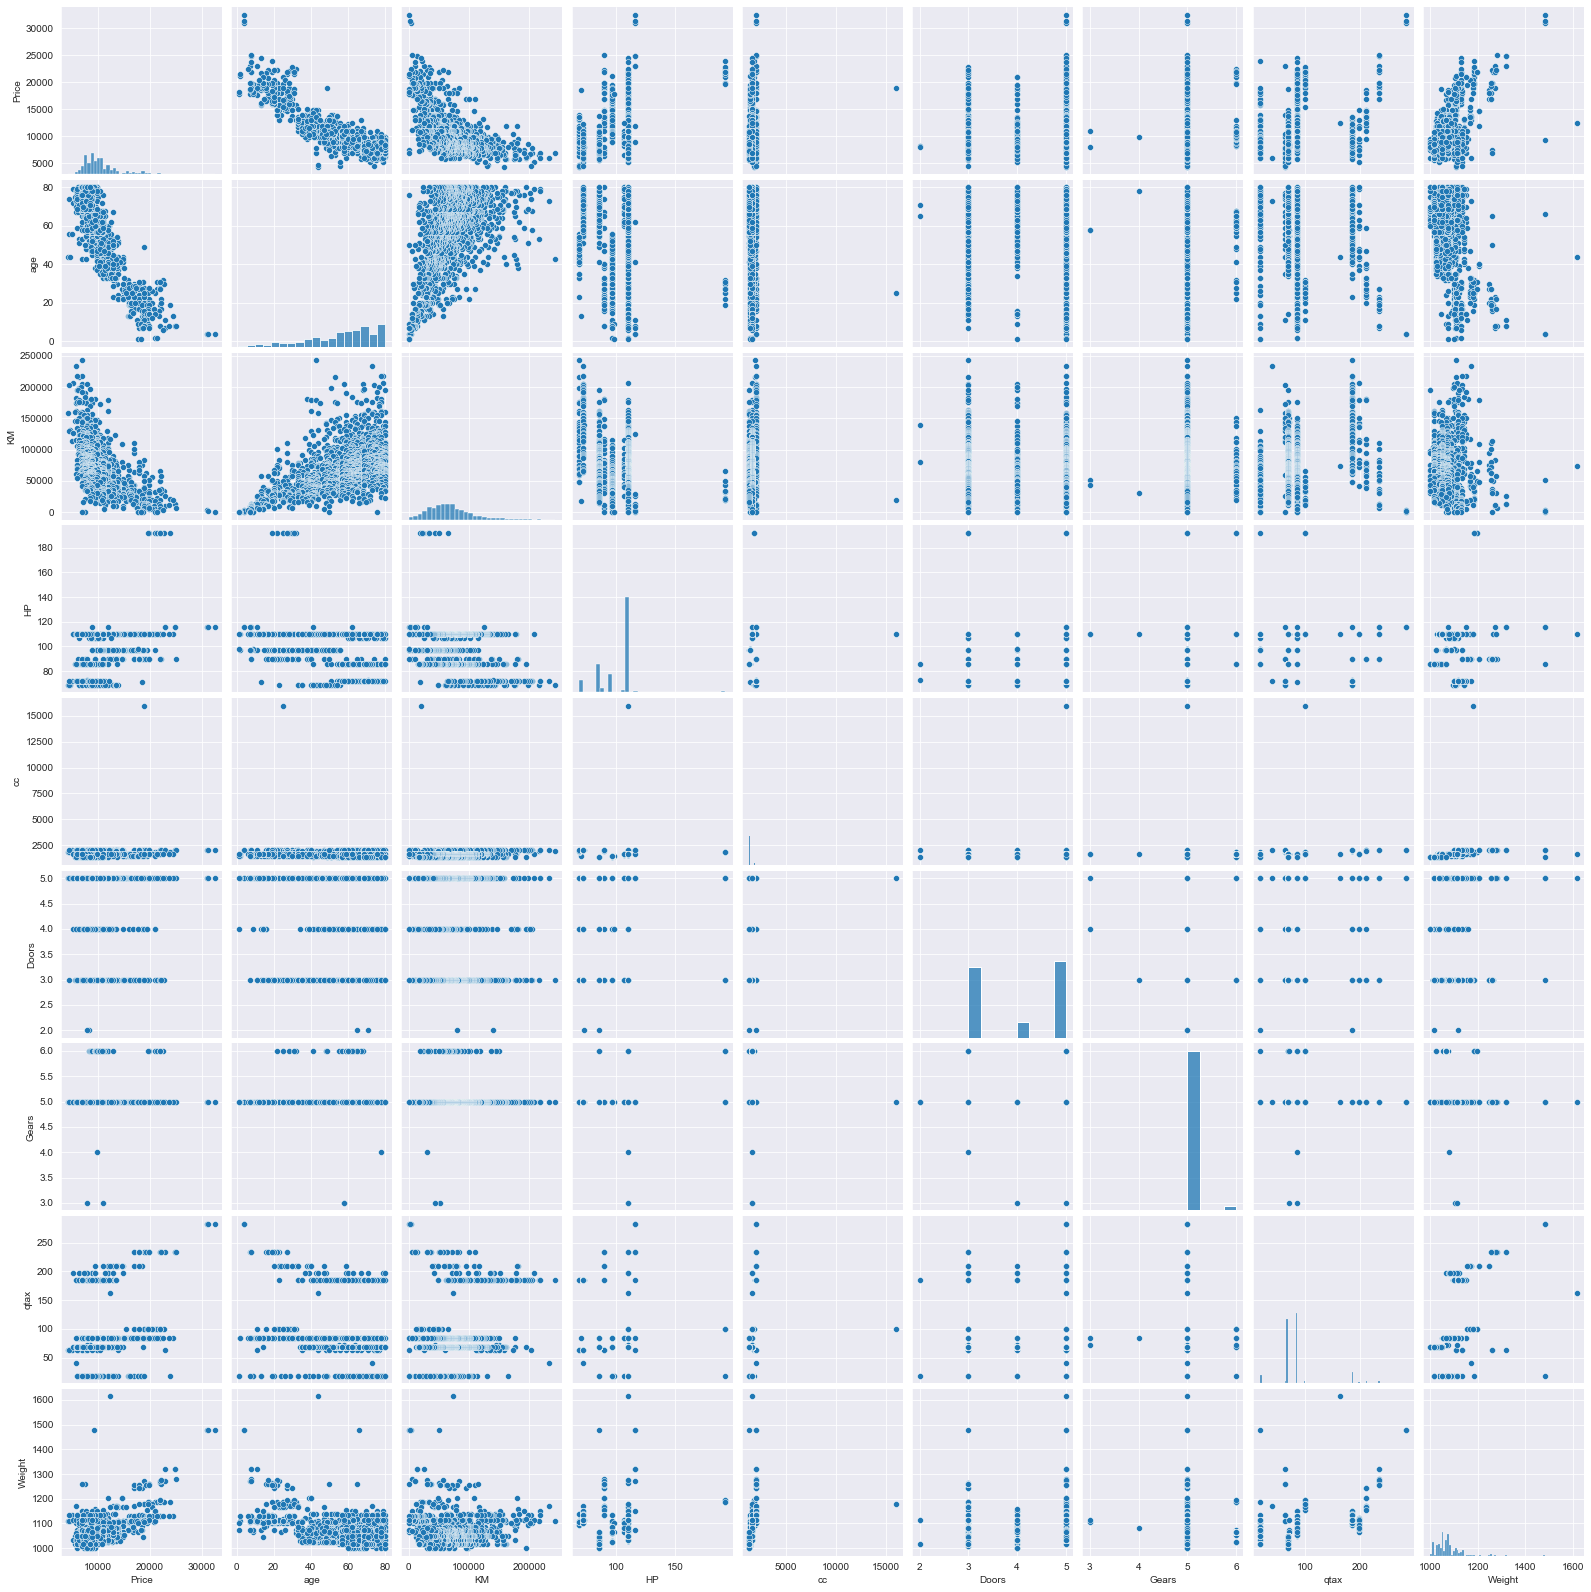

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [10]:
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:05:18   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

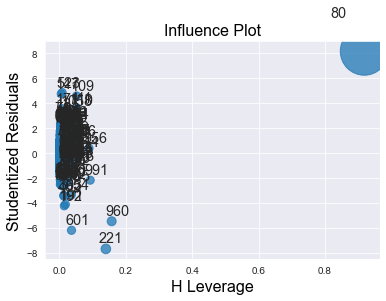

<Figure size 432x288 with 0 Axes>

In [11]:
influence_plot(model1)
plot=plt.figure()

In [12]:
# from above graph it is clear that index number 80,960,221,601 are out liers
# Removing of outliers
df2=df1.drop(df1.index[[80,960,221,601]],axis=0).reset_index()
df2=df2.drop(['index'],axis=1)
df2.head(2)

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


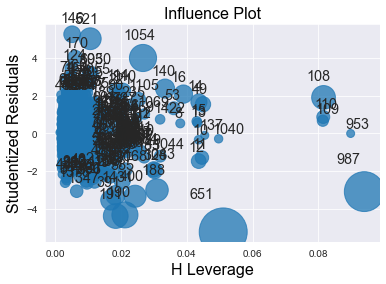

<Figure size 432x288 with 0 Axes>

In [13]:
model2=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=df2).fit()
influence_plot(model2)
plot=plt.figure()


In [14]:
# from above graph index 651 has maximum impact as outliers
#Removing the index 651, 987
df3=df2.drop(df2.index[[651]],axis=0).reset_index()
df3=df3.drop(['index'],axis=1)
model3=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1459.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:06:24   Log-Likelihood:                -12169.
No. Observations:                1431   AIC:                         2.436e+04
Df Residuals:                    1422   BIC:                         2.440e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.731e+04   1423.084    -12.162      0.000   -2.01e+04   -1.45e+04
age         -109.3979      2.428    -45.058      0.000    -114.161    -104.635
KM            -0.0176      0.001    -15.031      0.000      -0.020      -0.015
HP            33.0345      2.698     12.242      0.000      27.741      38.328
cc            -3.6666      0.294    -12.462      0.000      -4.244      -3.089
Doors       -161.2810     36.711     -4.393      0.000    -233.295     -89.268
Gears        461.7826    176.006      2.624      0.009     116.523     807.042
qtax           2.4869      1.368      1.817      0.069      -0.197       5.171
Weight        33.4779      1.295     25.848      0.000      30.937      36.019
==============================================================================
Omnibus:                       68.702   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.620
Skew:                           0.180   Prob(JB):                     2.02e-43
Kurtosis:                       4.780   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

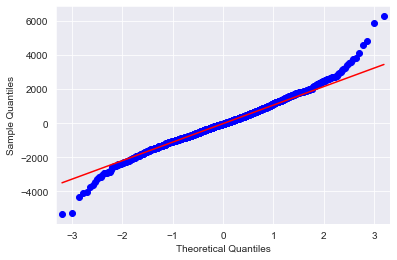

In [15]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.show()

In [16]:
list(np.where(model3.resid>4000))

[array([ 124,  146,  170,  521, 1053], dtype=int64)]

In [17]:
df4=df3.drop(df3.index[[124,146,170,521,1053]],axis=0).reset_index()
df4=df4.drop(['index'],axis=1)
final=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=df4).fit()
final.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1522.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:07:13   Log-Likelihood:                -12079.
No. Observations:                1426   AIC:                         2.418e+04
Df Residuals:                    1417   BIC:                         2.422e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.659e+04   1380.995    -12.012      0.000   -1.93e+04   -1.39e+04
age         -108.2818      2.355    -45.972      0.000    -112.902    -103.661
KM            -0.0178      0.001    -15.730      0.000      -0.020      -0.016
HP            34.6292      2.624     13.196      0.000      29.481      39.777
cc            -3.7913      0.285    -13.283      0.000      -4.351      -3.231
Doors       -161.0008     35.568     -4.527      0.000    -230.773     -91.229
Gears        462.9611    170.263      2.719      0.007     128.966     796.957
qtax           4.1108      1.341      3.065      0.002       1.480       6.742
Weight        32.6378      1.258     25.945      0.000      30.170      35.106
==============================================================================
Omnibus:                       22.013   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.033
Skew:                          -0.043   Prob(JB):                     3.34e-09
Kurtosis:                       3.806   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#mean error value
np.sqrt(np.mean(df4.Price-final.predict(df4))**2)

2.9984618036117573e-09

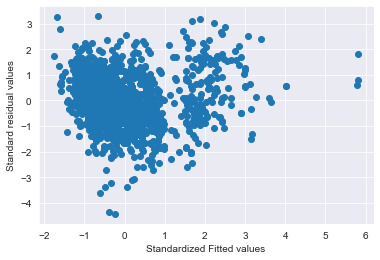

In [19]:
def get_standardized_values(value):
    return(value-value.mean())/value.std()

plt.scatter(get_standardized_values(final.fittedvalues),get_standardized_values(final.resid))
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standard residual values')
plt.show()


In [20]:
final_model=smf.ols('Price~np.square(age+KM+HP+cc+Doors+Gears+qtax+Weight)*age+KM+cc+Doors+HP+qtax+Weight',data=df4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1437.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:07:59   Log-Likelihood:                -12040.
No. Observations:                1426   AIC:                         2.410e+04
Df Residuals:                    1416   BIC:                         2.415e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -1.169e+04   1144.827    -10.212      0.000   -1.39e+04   -9445.604
np.square(age + KM + HP + cc + Doors + Gears + qtax + Weight)     -2.116e-07   2.92e-08     -7.242      0.000   -2.69e-07   -1.54e-07
age                                                                -122.5167      2.929    -41.829      0.000    -128.262    -116.771
np.square(age + KM + HP + cc + Doors + Gears + qtax + Weight):age  2.964e-09    3.2e-10      9.261      0.000    2.34e-09    3.59e-09
KM                                                                   -0.0126      0.003     -3.957      0.000      -0.019      -0.006
cc                                                                   -3.5817      0.280    -12.814      0.000      -4.130      -3.033
Doors                                                              -168.2547     34.003     -4.948      0.000    -234.957    -101.553
HP                                                                   36.0346      2.519     14.307      0.000      31.094      40.975
qtax                                                                  6.0287      1.318      4.573      0.000       3.443       8.615
Weight                                                               30.2252      1.255     24.093      0.000      27.764      32.686
==============================================================================
Omnibus:                       11.633   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.770
Skew:                          -0.034   Prob(JB):                     0.000228
Kurtosis:                       3.527   Cond. No.                     2.46e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  7.,   9.,  50., 142., 356., 430., 251., 132.,  41.,   8.]),
 array([-4292.90352461, -3492.3565957 , -2691.80966678, -1891.26273786,
        -1090.71580895,  -290.16888003,   510.37804889,  1310.9249778 ,
         2111.47190672,  2912.01883564,  3712.56576455]),
 <BarContainer object of 10 artists>)

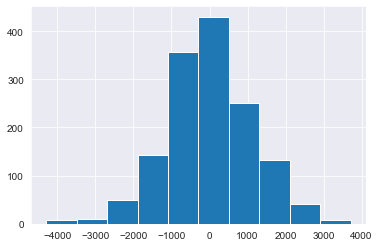

In [21]:
plt.hist(final_model.resid)